In [2]:
##excitement



EXCITEMENT

In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date

In [212]:
import pandas_datareader as data

In [213]:
import pandas_datareader as data

In [216]:
start = '2000-01-01'
end = date.today().strftime("%Y-%m-%d")

In [217]:
df = data.DataReader('AAPL','yahoo',start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1999-12-31,0.918527,0.888393,0.901228,0.917969,163811200.0,0.788183
2000-01-03,1.004464,0.907924,0.936384,0.999442,535796800.0,0.858137
2000-01-04,0.987723,0.903460,0.966518,0.915179,512377600.0,0.785788
2000-01-05,0.987165,0.919643,0.926339,0.928571,778321600.0,0.797286
2000-01-06,0.955357,0.848214,0.947545,0.848214,767972800.0,0.728291


In [219]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-09-13,151.419998,148.750000,150.630005,149.550003,102404300.0,149.550003
2021-09-14,151.070007,146.910004,150.350006,148.119995,109296300.0,148.119995
2021-09-15,149.440002,146.369995,148.559998,149.029999,83281300.0,149.029999
2021-09-16,148.970001,147.220001,148.440002,148.789993,68034100.0,148.789993
2021-09-17,148.820007,145.759995,148.820007,146.059998,129728700.0,146.059998


In [220]:
df = df.reset_index()

In [221]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,1999-12-31,0.918527,0.888393,0.901228,0.917969,163811200.0,0.788183
1,2000-01-03,1.004464,0.907924,0.936384,0.999442,535796800.0,0.858137
2,2000-01-04,0.987723,0.903460,0.966518,0.915179,512377600.0,0.785788
3,2000-01-05,0.987165,0.919643,0.926339,0.928571,778321600.0,0.797286
4,2000-01-06,0.955357,0.848214,0.947545,0.848214,767972800.0,0.728291


In [222]:
df = df.drop(['Date','Adj Close'], axis=1)

In [223]:
df.head()

,High,Low,Open,Close,Volume
0,0.918527,0.888393,0.901228,0.917969,163811200.0
1,1.004464,0.907924,0.936384,0.999442,535796800.0
2,0.987723,0.903460,0.966518,0.915179,512377600.0
3,0.987165,0.919643,0.926339,0.928571,778321600.0
4,0.955357,0.848214,0.947545,0.848214,767972800.0


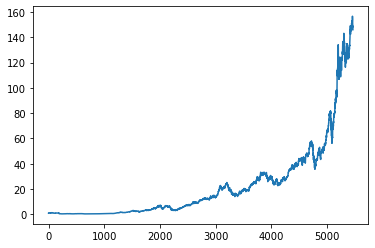

In [224]:
plt.plot(df.Close)

In [225]:
# creating moving averages MA100

ma100=df.Close.rolling(100).mean()


ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
5459    138.6135
5460    138.7753
5461    138.9224
5462    139.0631
5463    139.1798
Name: Close, Length: 5464, dtype: float64

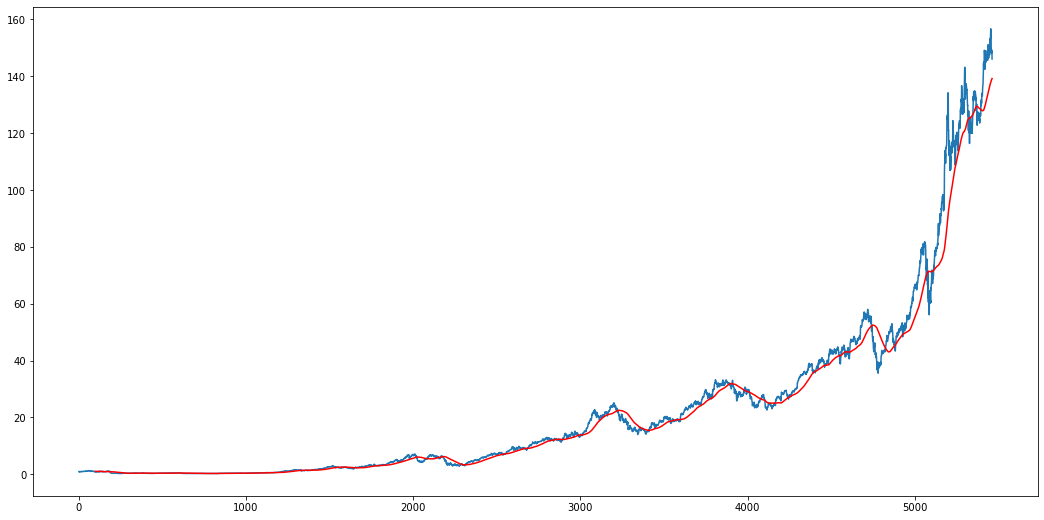

In [226]:
plt.figure(figsize = (18,9))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [227]:
# creating moving averages MA200

ma200=df.Close.rolling(200).mean()


ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
5459    133.38715
5460    133.54760
5461    133.70980
5462    133.85850
5463    133.97520
Name: Close, Length: 5464, dtype: float64

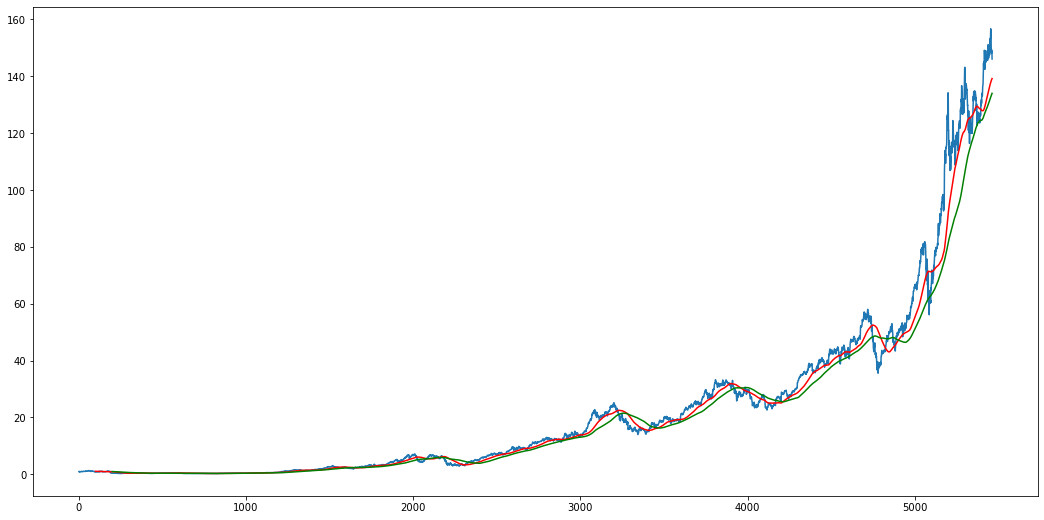

In [228]:
plt.figure(figsize = (18,9))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [229]:
df.shape

(5464, 5)

In [230]:
# Train Test Split

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(3824, 1)
(1640, 1)


In [231]:
data_training.head()

,Close
0,0.917969
1,0.999442
2,0.915179
3,0.928571
4,0.848214


In [232]:
data_testing.head()

,Close
3824,31.7600
3825,32.1175
3826,31.8750
3827,31.4750
3828,31.8025


In [233]:
# we have to scale down the data for stack lstm input hence we import minmaxScalar from sklearn

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))



In [234]:
data_training_array = scaler.fit_transform(data_training)

In [235]:
data_testing_array 


array([[1.28606465e-03],
       [7.89975356e-04],
       [0.00000000e+00],
       ...,
       [9.49573368e-01],
       [9.47993386e-01],
       [9.30021529e-01]])

In [236]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100 : i])
    y_train.append(data_training_array[i,0])
                   
                   
    

In [237]:
len(x_train)


3724

In [238]:
len(y_train)

3724

In [239]:
len(data_training_array)

3824

In [240]:
# converting these arrays into numpy arrays coz LSTM asks for numpy arrays only

x_train, y_train = np.array(x_train), np.array(y_train)

In [241]:
x_train.shape



(3724, 100, 1)

# ML Model FINALLY

In [242]:
from keras.layers import Dense, Dropout , LSTM
from keras.models import Sequential

In [243]:
# creating the model

model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
              input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences = True ))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences = True ))
model.add(Dropout(0.4))




model.add(LSTM(units = 120, activation = 'relu' ))
model.add(Dropout(0.5))

model.add(Dense(units = 1))



In [244]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_31 (LSTM)               (None, 100, 50)           10400     
_________________________________________________________________
dropout_28 (Dropout)         (None, 100, 50)           0         
_________________________________________________________________
lstm_32 (LSTM)               (None, 100, 60)           26640     
_________________________________________________________________
dropout_29 (Dropout)         (None, 100, 60)           0         
_________________________________________________________________
lstm_33 (LSTM)               (None, 100, 80)           45120     
_________________________________________________________________
dropout_30 (Dropout)         (None, 100, 80)           0         
_________________________________________________________________
lstm_34 (LSTM)               (None, 120)             

In [245]:
model.compile(optimizer = 'adam' , loss = 'mean_squared_error')
model.fit(x_train , y_train , epochs = 15)


Epoch 1/15
117/117 [==============================] - 41s 282ms/step - loss: 0.0121
Epoch 2/15
117/117 [==============================] - 36s 304ms/step - loss: 0.0049
Epoch 3/15
117/117 [==============================] - 29s 251ms/step - loss: 0.0029
Epoch 4/15
117/117 [==============================] - 30s 259ms/step - loss: 0.0026
Epoch 5/15
117/117 [==============================] - 33s 283ms/step - loss: 0.0025
Epoch 6/15
117/117 [==============================] - 30s 260ms/step - loss: 0.0023
Epoch 7/15
117/117 [==============================] - 32s 275ms/step - loss: 0.0027
Epoch 8/15
117/117 [==============================] - 36s 304ms/step - loss: 0.0024
Epoch 9/15
117/117 [==============================] - 27s 233ms/step - loss: 0.0022
Epoch 10/15
117/117 [==============================] - 36s 311ms/step - loss: 0.0023
Epoch 11/15
117/117 [==============================] - 29s 248ms/step - loss: 0.0022
Epoch 12/15
117/117 [==============================] - 27s 234ms/step - lo

In [249]:
model.save('keras_model_10_epochs.h5')
model.save('Latest_keras_model_10_epochs.h5')

In [250]:
data_testing.head()

,Close
3824,31.7600
3825,32.1175
3826,31.8750
3827,31.4750
3828,31.8025


In [251]:
past_100_days = data_training.tail(100)

In [252]:
final_df = past_100_days.append(data_testing, ignore_index = True)

In [253]:
final_df.head()

,Close
0,25.617500
1,25.747499
2,26.207500
3,26.305000
4,26.277500


In [254]:
input_data = scaler.fit_transform(final_df)

In [255]:
input_data

array([[0.02261289],
       [0.02358227],
       [0.02701243],
       ...,
       [0.94288055],
       [0.94109087],
       [0.92073372]])

In [256]:
input_data.shape


(1740, 1)

In [257]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [259]:
# converting these arrays into numpy arrays coz LSTM asks for numpy arrays only

x_test, y_test = np.array(x_test), np.array(y_test)

In [260]:
input_data.shape

(1740, 1)

# Prediction

In [261]:
y_predicted = model.predict(x_test)

In [262]:
y_predicted.shape

(1640, 1)

In [263]:
y_predicted

array([[0.08681746],
       [0.08721903],
       [0.08754042],
       ...,
       [0.91395336],
       [0.9150116 ],
       [0.91531295]], dtype=float32)

In [264]:
y_test

array([0.06841655, 0.07108237, 0.06927408, ..., 0.94288055, 0.94109087,
       0.92073372])

In [270]:
scaler.scale_

array([0.00745684])

In [271]:
scale_factor = 1/0.00745684

In [272]:
y_predicted = y_predicted*scale_factor

In [273]:
y_test = y_test*scale_factor

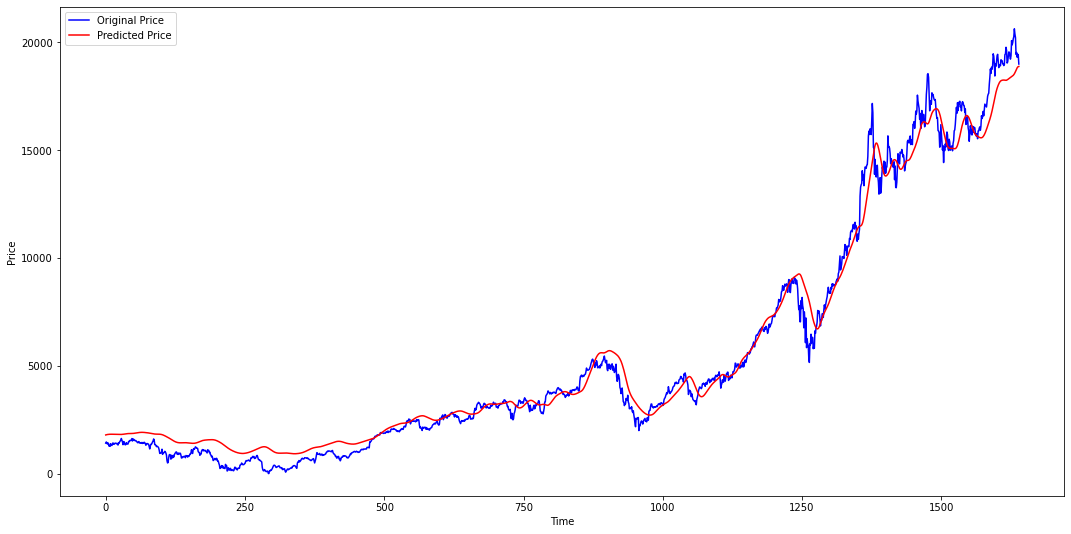

In [274]:
plt.figure(figsize = (18,9))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()